In [4]:
# Setup
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from pathlib import Path

# Import custom methods
import sys
sys.path.append("../") # go to parent dir
from utilities import utilities as utils

# Ignore deprecation warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# Setup Paths
pickle_path = Path('../../pickles')
fig_path = Path('../../figures')

# Read Data
features_a = pd.read_pickle(pickle_path / "features_a.pkl")

# Split data
# Pull out labels
X = features_a.drop(['label', 'tot_chrgs'], axis=1)
y = features_a[['label']]

# Same features and splits used for all models
X_train, X_test, y_train, y_test = utils.scale_split_data(X, y, 'a')

In [4]:
# Logistic Regression 
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0).fit(X_train, np.ravel(y_train))  

print("Train Score: {:.3f}".format(LR.score(X_train,y_train)))
print("Test Score: {:.3f}".format(LR.score(X_test,y_test)))

utils.make_pickle(LR, pickle_path / 'a_logreg.pkl')

Train Score: 0.861
Test Score: 0.843


INTERCEPT
20.0% probability of house having an EV


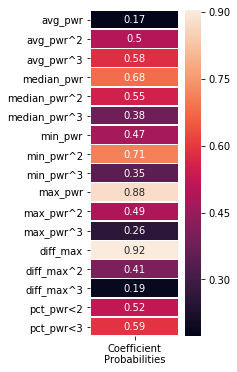

In [5]:
# Intercept and Coefficient Evaluation
utils.logreg_evaluation(LR, X_train, 'a', fig_path)

ROC AUC Score: 0.901
Average Precision Score: 0.797
Balanced Accuracy Score: 0.792


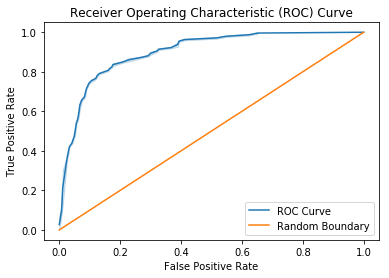

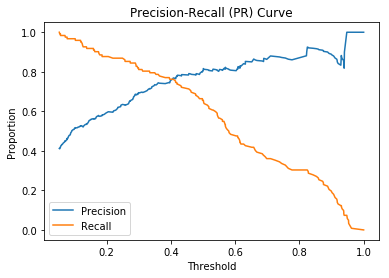

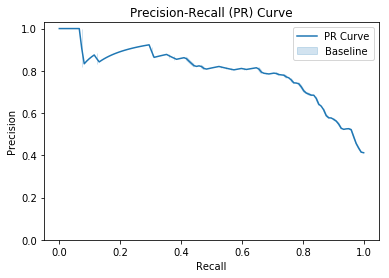

Training Score, 0.861
Testing Score, 0.843
ROC AUC, 0.901
Average Precision Score, 0.797
Balanced Accuracy Score, 0.792


In [27]:
# ROC and PR Curves
utils.model_evaluation(LR, X_train, y_train, X_test, y_test, 'a', fig_path)